In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\Asus Rog Strix\\Desktop\\FAX\\Analiza podatkov kupcev\\SVM\\Podatki\\Dr_podatki_obdelani5.csv",  encoding = "ISO-8859-1")

In [4]:
df

,PLANNO,PERNO,SEX,KRAJ,DRZAVA,POSTCODE,DAVCNA_STEVILKA,STAROST
0,450,69814,M,CERKNICA,SLOVENIJA,1380,11702338,65
1,450,171359,M,PUCONCI,SLOVENIJA,9201,13751093,73
2,450,40849,F,ROGASKA SLATINA,SLOVENIJA,3250,33379629,42
3,450,223698,F,LJUBLJANA,SLOVENIJA,1000,34518916,48
4,450,178206,M,NOVO MESTO,SLOVENIJA,8000,61677787,68
...,...,...,...,...,...,...,...,...
178738,320,241916,F,LJUBLJANA,SLOVENIJA,1000,35336439,31
178739,136,48404,F,GRADAC,SLOVENIJA,8332,59156716,63
178740,800,494461,N,LJUBLJANA,SLOVENIJA,1000,84382856,45
178741,800,557804,N,SEMPETER PRI GORICI,SLOVENIJA,5290,45156204,43


In [5]:
y= df['STAROST']
x= df['PLANNO']

In [6]:
y= np.array(y,dtype=int) 
x= np.array(x,dtype=int)

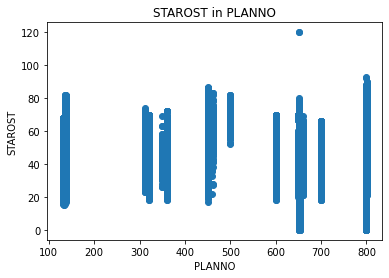

In [7]:
plt.scatter(x,y)
plt.title("STAROST in PLANNO")
plt.xlabel("PLANNO")
plt.ylabel("STAROST")
plt.show()

In [8]:
def grubbs_stat(y):
  std_dev = np.std(y)
  avg_y = np.mean(y)
  abs_val_minus_avg = abs(y - avg_y)
  max_of_deviations = max(abs_val_minus_avg)
  max_ind = np.argmax(abs_val_minus_avg)
  Gcal = max_of_deviations/ std_dev
  print("Grubbs Statistics Value : {}".format(Gcal))
  return Gcal, max_ind

In [9]:
def calculate_critical_value(size, alpha):
  t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
  numerator = (size - 1) * np.sqrt(np.square(t_dist))
  denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
  critical_value = numerator / denominator
  print("Grubbs Critical Value: {}".format(critical_value))
  return critical_value

In [10]:
def check_G_values(Gs, Gc, inp, max_index):
  if Gs > Gc:
      print('{} is an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index], Gs, Gc))
  else:
      print('{} is not an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index], Gs, Gc))

In [11]:
def ESD_Test(input_series, alpha, max_outliers):
  for iterations in range(max_outliers):
      Gcritical = calculate_critical_value(len(input_series), alpha)
      Gstat, max_index = grubbs_stat(input_series)
      check_G_values(Gstat, Gcritical, input_series, max_index)
      input_series = np.delete(input_series, max_index)

In [13]:
ESD_Test(y, 0.05, 4)

Grubbs Critical Value: 5.136432606914459
Grubbs Statistics Value : 5.205762056137465
120 is an outlier. G > G-critical: 5.2058 > 5.1364 

Grubbs Critical Value: 5.136431554157906
Grubbs Statistics Value : 5.2061712999904
120 is an outlier. G > G-critical: 5.2062 > 5.1364 

Grubbs Critical Value: 5.136430501257801
Grubbs Statistics Value : 3.332821725979061
93 is not an outlier. G > G-critical: 3.3328 > 5.1364 

Grubbs Critical Value: 5.136429448512595
Grubbs Statistics Value : 3.263534171745317
92 is not an outlier. G > G-critical: 3.2635 > 5.1364 

